<a href="https://colab.research.google.com/github/Je73hwg/1BM22CS046_MLLAB/blob/main/CS046_KNN_LAB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Load the Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load dataset
data = pd.read_csv('/content/iris (3).csv')

# Preprocess the Data
X, y = data.drop('species', axis=1), data['species']  # Features and target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data

# Train KNN Classifier
best_k, best_score = 0, 0
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score, best_k = score, k

print(f'Best K: {best_k}, Best Score: {best_score:.2f}')

# Display Results
y_pred = KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train).predict(X_test)
print(f'\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}')
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Best K: 1, Best Score: 1.00

Accuracy Score: 1.00

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Step 1: Load the Data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
data = pd.read_csv('/content/diabetes.csv')

# Check the first few rows and the columns of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nColumns in the dataset:")
print(data.columns)

# Step 2: Preprocess the Data
# Ensure the target variable is correctly referenced
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Train KNN Classifier
k = 5  # Chosen K value
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Step 4: Display Results
# Predict on the test data
y_pred = knn.predict(X_test_scaled)

# Display accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Clean output display
print("\n--- Results ---")
print(f"Accuracy Score: {accuracy:.2f}\n")

print("Confusion Matrix:")
print(f"{'True Negatives (0)':<20} : {cm[0][0]}")
print(f"{'False Positives (1)':<20} : {cm[0][1]}")
print(f"{'False Negatives (0)':<20} : {cm[1][0]}")
print(f"{'True Positives (1)':<20} : {cm[1][1]}")

First few rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Columns in the dataset:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

--- Results ---
Accuracy Score: 0.69

Confusion Matrix:
True Negatives (0)   : 79
Fal

Best K: 11, Best Score: 0.75




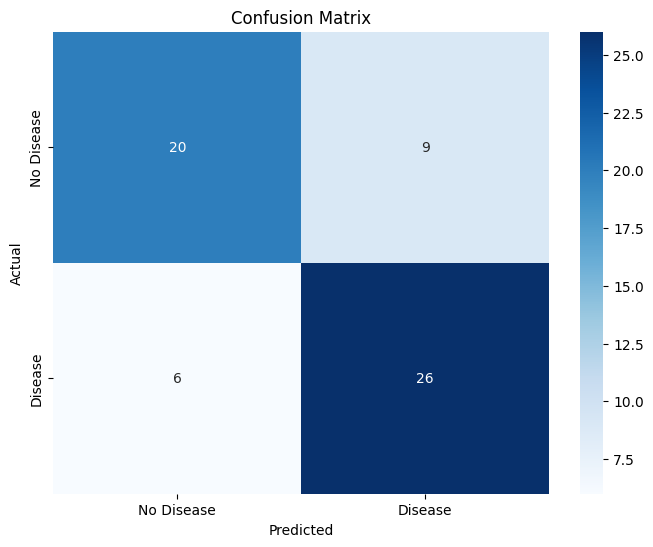

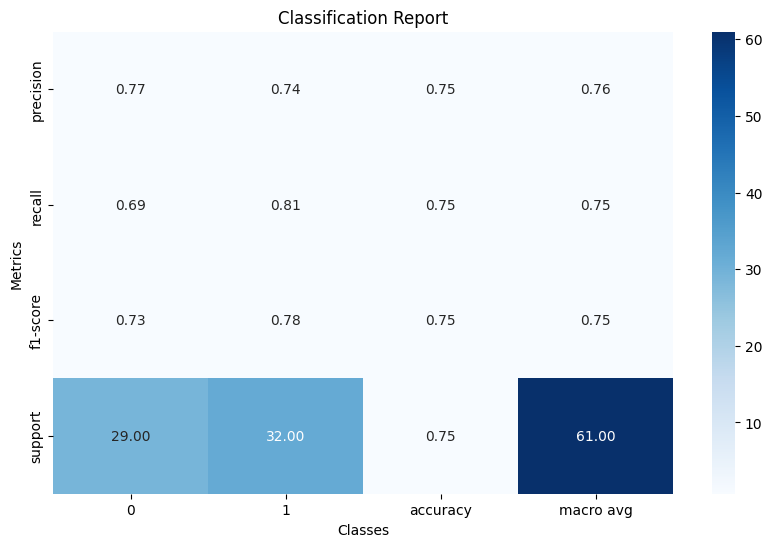

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.69      0.73        29
           1       0.74      0.81      0.78        32

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



In [ ]:
# Step 1: Load the Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Step 2: Preprocess the Data
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train KNN Classifier
best_k = 0
best_score = 0

for k in range(1, 21):  # Testing K values from 1 to 20
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_k = k

# Display the best K and score
print(f'Best K: {best_k}, Best Score: {best_score:.2f}\n')

# Step 4: Plot Confusion Matrix
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
print()
plt.show()

# Step 5: Plot Classification Report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert the report to a DataFrame for visualization
report_df = pd.DataFrame(report).transpose()

# Plotting the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report')
plt.xlabel('Classes')
plt.ylabel('Metrics')
print()
plt.show()

# Print the classification report as text
print("Classification Report:\n")
print(classification_report(y_test, y_pred))